# Correlation of Firing between structures

In [40]:
import cProfile
import sys
import itertools

import numpy as np
import pandas as pd
import scipy.signal
from scipy.signal import savgol_filter
from scipy.stats import zscore

from tqdm import tqdm

import neuroseries as nts


import time
import matplotlib.pyplot as plt
# %matplotlib qt

import seaborn as sns
import bk.load
import bk.compute
import bk.plot

import os


In [44]:
bk.load.current_session_linux()
neurons,metadata = bk.load.spikes()
states = bk.load.states()

for i,n in enumerate(neurons):
    neurons[i] = n.restrict(states['sws'])

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /home/billel/Data/GG-Dataset/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


In [45]:
neurons = {
    'Hpc':neurons[metadata.Region == 'Hpc'],
    'CeCM':neurons[metadata.Region == 'CeCM']
}

binMatrix = {
    'Hpc':bk.compute.binSpikes(neurons['Hpc'],1)[1],
    'BLA':bk.compute.binSpikes(neurons['CeCM'],1)[1]
}

hpc = np.mean(binMatrix['Hpc'],0)
bla = np.mean(binMatrix['BLA'],0)

plt.scatter(hpc,bla,2)

ValueError: zero-size array to reduction operation maximum which has no identity

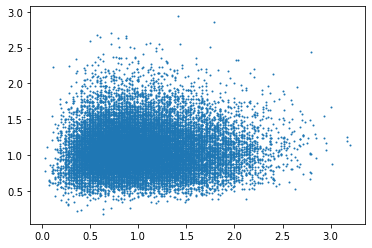